**IMPORTS**


Considering the coefficients assigned to each of the attributes by the linear models: the linear kernel SVC and the SGDClassifier, the lowest coefficients in the above linear models have been given to DUE_AMT_SEP,PAY_SEP.From the results DUE_AMT_SEP,PAY_SEP were eliminated then we used upsampled and then used XGBoost to traim the model

In [1]:
!pip install kaggle

In [0]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import IsolationForest

In [0]:
import time
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

In [0]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "svm"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

credit_card_default_train.csv was uploaded

**DATA-PREPARATION**

In [6]:
import pandas as pd

cc_train = pd.read_csv('credit_card_default_train.csv')
cc_train.head()

,Client_ID,Balance_Limit_V1,Gender,EDUCATION_STATUS,MARITAL_STATUS,AGE,PAY_JULY,PAY_AUG,PAY_SEP,PAY_OCT,PAY_NOV,PAY_DEC,DUE_AMT_JULY,DUE_AMT_AUG,DUE_AMT_SEP,DUE_AMT_OCT,DUE_AMT_NOV,DUE_AMT_DEC,PAID_AMT_JULY,PAID_AMT_AUG,PAID_AMT_SEP,PAID_AMT_OCT,PAID_AMT_NOV,PAID_AMT_DEC,NEXT_MONTH_DEFAULT
0,A2,1M,M,Graduate,Other,31-45,-1,-1,-1,-1,-1,-1,3248,3389,6004,39418,162772,-13982,3437,6004,39418,162772,0,538165,0
1,A3,1M,F,High School,Other,Less than 30,0,-1,-1,-1,-1,0,353351,151818,26948,43530,80811,124590,151818,46200,43530,80811,942,33666,0
2,A4,100K,F,High School,Single,31-45,4,3,2,2,-2,-2,16681,16082,15477,0,0,0,0,0,0,0,0,0,1
3,A5,200K,F,Graduate,Single,31-45,2,0,0,0,0,0,90457,92848,95193,97309,100353,102740,3855,3890,3696,4620,4049,3918,1
4,A6,1M,F,Graduate,Other,31-45,2,2,0,0,0,0,429556,419466,429785,435354,445271,453899,0,20790,16170,17325,16401,17325,0


In [7]:
for col in cc_train.columns: 
    print(col)

Client_ID
Balance_Limit_V1
Gender
EDUCATION_STATUS
MARITAL_STATUS
AGE
PAY_JULY
PAY_AUG
PAY_SEP
PAY_OCT
PAY_NOV
PAY_DEC
DUE_AMT_JULY
DUE_AMT_AUG
DUE_AMT_SEP
DUE_AMT_OCT
DUE_AMT_NOV
DUE_AMT_DEC
PAID_AMT_JULY
PAID_AMT_AUG
PAID_AMT_SEP
PAID_AMT_OCT
PAID_AMT_NOV
PAID_AMT_DEC
NEXT_MONTH_DEFAULT


In [8]:
cc_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 25 columns):
Client_ID             24000 non-null object
Balance_Limit_V1      24000 non-null object
Gender                24000 non-null object
EDUCATION_STATUS      24000 non-null object
MARITAL_STATUS        24000 non-null object
AGE                   24000 non-null object
PAY_JULY              24000 non-null int64
PAY_AUG               24000 non-null int64
PAY_SEP               24000 non-null int64
PAY_OCT               24000 non-null int64
PAY_NOV               24000 non-null int64
PAY_DEC               24000 non-null int64
DUE_AMT_JULY          24000 non-null int64
DUE_AMT_AUG           24000 non-null int64
DUE_AMT_SEP           24000 non-null int64
DUE_AMT_OCT           24000 non-null int64
DUE_AMT_NOV           24000 non-null int64
DUE_AMT_DEC           24000 non-null int64
PAID_AMT_JULY         24000 non-null int64
PAID_AMT_AUG          24000 non-null int64
PAID_AMT_SEP          240

In [0]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(cc_train, test_size=0.2, random_state=96)

Saving figure attribute_histogram_plots


FileNotFoundError: ignored

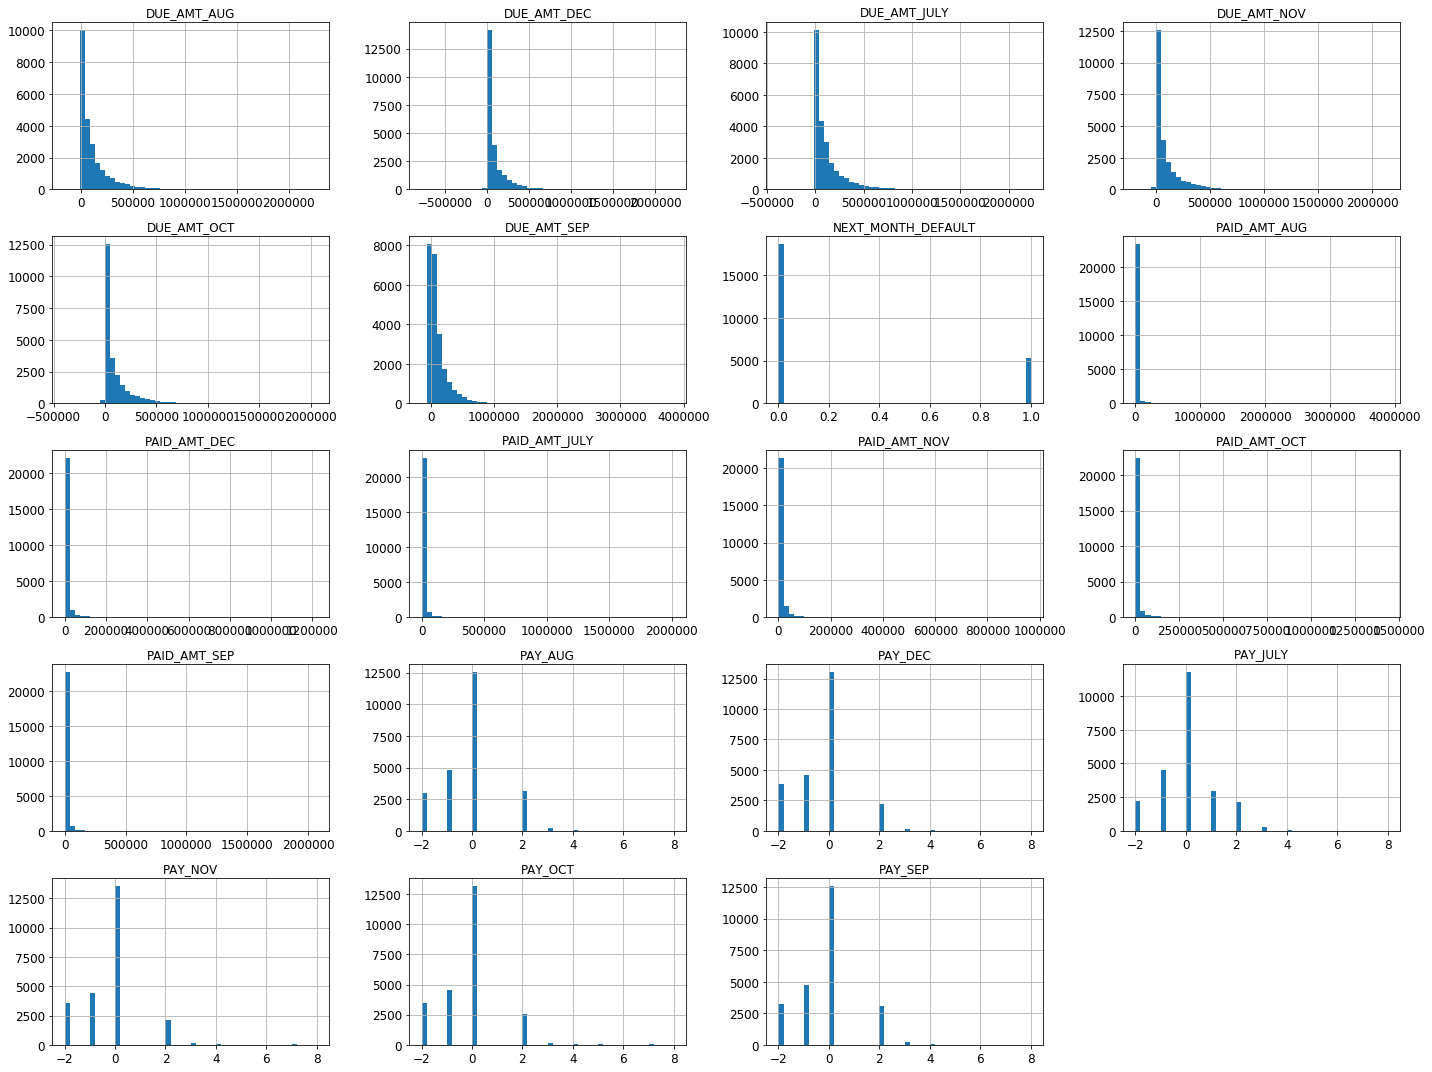

In [10]:
import matplotlib.pyplot as plt
cc_train.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

In [0]:
cc_train1=cc_train.copy()

In [12]:
corr_matrix = cc_train1.corr()
corr_matrix["NEXT_MONTH_DEFAULT"].sort_values(ascending=False)

NEXT_MONTH_DEFAULT    1.000000
PAY_JULY              0.324362
PAY_AUG               0.260531
PAY_SEP               0.229338
PAY_OCT               0.212407
PAY_NOV               0.201231
PAY_DEC               0.187095
DUE_AMT_DEC          -0.006521
DUE_AMT_NOV          -0.007614
DUE_AMT_OCT          -0.009755
DUE_AMT_SEP          -0.014722
DUE_AMT_AUG          -0.015180
DUE_AMT_JULY         -0.020010
PAID_AMT_DEC         -0.052466
PAID_AMT_NOV         -0.053849
PAID_AMT_OCT         -0.056143
PAID_AMT_SEP         -0.057808
PAID_AMT_AUG         -0.059039
PAID_AMT_JULY        -0.072891
Name: NEXT_MONTH_DEFAULT, dtype: float64

**FEATURE SELECTION**
method 1- elaborated on previous notebook

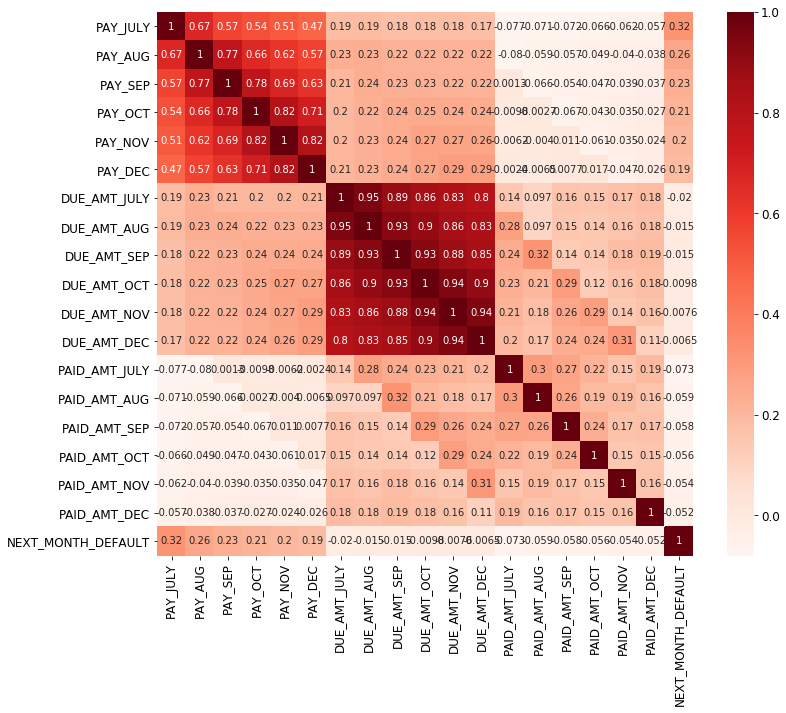

In [13]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = cc_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [14]:
#Correlation with output variable
cor_target = abs(cor["NEXT_MONTH_DEFAULT"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target<0.01]
relevant_features

DUE_AMT_OCT    0.009755
DUE_AMT_NOV    0.007614
DUE_AMT_DEC    0.006521
Name: NEXT_MONTH_DEFAULT, dtype: float64

 **FEATURE SELECTION USING LINEAR MODELS**

In [0]:
c_feature=train_set.drop(["NEXT_MONTH_DEFAULT","Client_ID"],axis=1)
cc_feature_num = cc_feature.drop(["Balance_Limit_V1","Gender","EDUCATION_STATUS","MARITAL_STATUS","AGE"]  ,axis=1)
cc_feature_cat = cc_feature[["Balance_Limit_V1","Gender","EDUCATION_STATUS","MARITAL_STATUS","AGE"]].copy()


**TRANSFORMATION-PIPELINE**

In [0]:

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

num_attribs = list(cc_feature_num)
cat_attribs = list(cc_feature_cat)

full_pipeline = ColumnTransformer([
        ('imputer' , SimpleImputer(strategy="median"),num_attribs),
        ('std_scaler' , StandardScaler(),num_attribs),
        #('imputer1' , SimpleImputer(strategy="most_frequent"),num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])


cc_feature_train = full_pipeline.fit_transform(cc_feature)


In [0]:
cc_feature_ex=test_set.drop(["NEXT_MONTH_DEFAULT","Client_ID"],axis=1)
cc_feature_test = full_pipeline.fit_transform(cc_feature_ex)

In [0]:
cc_labels = train_set["NEXT_MONTH_DEFAULT"].copy()
cc_labels_test = test_set["NEXT_MONTH_DEFAULT"].copy()

FEATURE SELECTION USING LOGISTICREGRESSION

0.8004166666666667
('DUE_AMT_SEP', -1.4494278634170497e-05) 

('DUE_AMT_AUG', -1.253538997040272e-05) 

('DUE_AMT_OCT', -5.10805659694436e-06) 

('DUE_AMT_NOV', -3.3058886893170897e-06) 

('PAY_AUG', -3.2772400152596822e-06) 

('PAID_AMT_JULY', -2.4891677834256903e-06) 

('DUE_AMT_JULY', -2.2010839941336865e-06) 

('DUE_AMT_DEC', -1.6903929723954015e-07) 

('PAY_SEP', 4.4481950798715506e-08) 

('PAY_DEC', 1.6059451321233048e-07) 

('PAY_NOV', 2.845311685612893e-07) 

('PAY_OCT', 6.57957865228754e-07) 

('PAID_AMT_DEC', 0.061503842581822586) 

('PAID_AMT_NOV', 0.06430910764789909) 

('PAID_AMT_OCT', 0.06433800746167964) 

('PAID_AMT_SEP', 0.07220181346517208) 

('PAID_AMT_AUG', 0.08526236218723772) 

('EDUCATION_STATUS', 0.0886937531482169) 

('AGE', 0.08889982632808457) 

('PAY_JULY', 0.08932208165348816) 

('MARITAL_STATUS', 0.09085285601906955) 

('Gender', 0.09620775454271961) 

('Balance_Limit_V1', 0.09738746306830019) 



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


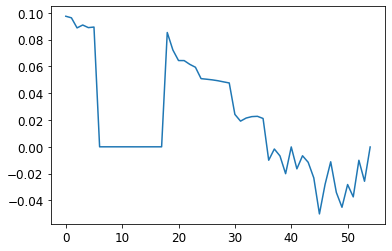

In [21]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(cc_feature_train,cc_labels)
y_pred_svc = lr.predict(cc_feature_test)
print(accuracy_score(cc_labels_test,y_pred_svc))
print(plt.plot(lr.coef_.ravel()))
def takeSecond(elem):
    return elem[1]

for j in sorted(list(zip(cc_feature.columns,lr.coef_.ravel())),key = takeSecond):
  print(j,'\n')

FEATURE SELECTION USING SGDCLASSIFIER

0.7479166666666667
('PAY_SEP', -3314.8753613611975) 

('DUE_AMT_SEP', -2875.5110900576256) 

('DUE_AMT_OCT', -1890.3889038760879) 

('DUE_AMT_JULY', -1535.010556324801) 

('DUE_AMT_NOV', -707.2113876654272) 

('DUE_AMT_AUG', -496.1967542369153) 

('PAY_NOV', -333.7364829775487) 

('PAY_DEC', 193.20204509172123) 

('PAY_JULY', 287.9529678825397) 

('PAY_AUG', 342.52660809152235) 

('AGE', 351.7943170957943) 

('PAID_AMT_DEC', 438.4306586286925) 

('MARITAL_STATUS', 465.3818369254352) 

('PAID_AMT_JULY', 488.11224856375935) 

('PAID_AMT_NOV', 502.25820600757436) 

('PAID_AMT_OCT', 563.4576156848437) 

('EDUCATION_STATUS', 582.5490846522989) 

('PAID_AMT_SEP', 689.227286232279) 

('Gender', 755.4860835919442) 

('DUE_AMT_DEC', 813.6996875051103) 

('PAID_AMT_AUG', 847.3917954461853) 

('Balance_Limit_V1', 944.3253353088272) 

('PAY_OCT', 1444.0071611770086) 



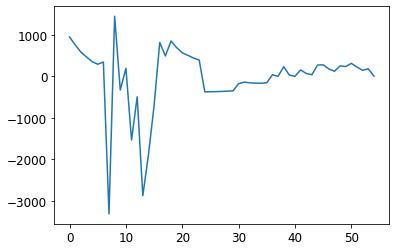

In [22]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(cc_feature_train,cc_labels)
y_pred_svc = sgd.predict(cc_feature_test)

print(accuracy_score(cc_labels_test,y_pred_svc))
print(plt.plot(sgd.coef_.ravel()))
def takeSecond(elem):
    return elem[1]

for j in sorted(list(zip(cc_feature.columns,sgd.coef_.ravel())),key = takeSecond):
  print(j,'\n')

**"DUE_AMT_SEP","PAY_SEP" WERE ELIMINATED**

In [0]:
cc_attr=train_set.drop(["NEXT_MONTH_DEFAULT","Client_ID","DUE_AMT_SEP","PAY_SEP"],axis=1)

In [24]:
cc_attr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19200 entries, 3130 to 14420
Data columns (total 21 columns):
Balance_Limit_V1    19200 non-null object
Gender              19200 non-null object
EDUCATION_STATUS    19200 non-null object
MARITAL_STATUS      19200 non-null object
AGE                 19200 non-null object
PAY_JULY            19200 non-null int64
PAY_AUG             19200 non-null int64
PAY_OCT             19200 non-null int64
PAY_NOV             19200 non-null int64
PAY_DEC             19200 non-null int64
DUE_AMT_JULY        19200 non-null int64
DUE_AMT_AUG         19200 non-null int64
DUE_AMT_OCT         19200 non-null int64
DUE_AMT_NOV         19200 non-null int64
DUE_AMT_DEC         19200 non-null int64
PAID_AMT_JULY       19200 non-null int64
PAID_AMT_AUG        19200 non-null int64
PAID_AMT_SEP        19200 non-null int64
PAID_AMT_OCT        19200 non-null int64
PAID_AMT_NOV        19200 non-null int64
PAID_AMT_DEC        19200 non-null int64
dtypes: int64(16), obj

In [0]:
cc_labels = train_set["NEXT_MONTH_DEFAULT"].copy()

In [0]:
cc_data=cc_attr.copy()

In [27]:
cc_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19200 entries, 3130 to 14420
Data columns (total 21 columns):
Balance_Limit_V1    19200 non-null object
Gender              19200 non-null object
EDUCATION_STATUS    19200 non-null object
MARITAL_STATUS      19200 non-null object
AGE                 19200 non-null object
PAY_JULY            19200 non-null int64
PAY_AUG             19200 non-null int64
PAY_OCT             19200 non-null int64
PAY_NOV             19200 non-null int64
PAY_DEC             19200 non-null int64
DUE_AMT_JULY        19200 non-null int64
DUE_AMT_AUG         19200 non-null int64
DUE_AMT_OCT         19200 non-null int64
DUE_AMT_NOV         19200 non-null int64
DUE_AMT_DEC         19200 non-null int64
PAID_AMT_JULY       19200 non-null int64
PAID_AMT_AUG        19200 non-null int64
PAID_AMT_SEP        19200 non-null int64
PAID_AMT_OCT        19200 non-null int64
PAID_AMT_NOV        19200 non-null int64
PAID_AMT_DEC        19200 non-null int64
dtypes: int64(16), obj

In [28]:
cc_labels.describe

<bound method NDFrame.describe of 3130     0
23977    1
21794    0
16092    0
18190    0
        ..
8801     0
22132    0
2412     0
9638     0
14420    0
Name: NEXT_MONTH_DEFAULT, Length: 19200, dtype: int64>

In [0]:
cc_num = cc_data.drop(["Balance_Limit_V1","Gender","EDUCATION_STATUS","MARITAL_STATUS","AGE"]  ,axis=1)
cc_cat = cc_data[["Balance_Limit_V1","Gender","EDUCATION_STATUS","MARITAL_STATUS","AGE"]].copy()

In [0]:
cc_cat = cc_data[["Balance_Limit_V1","Gender","EDUCATION_STATUS","MARITAL_STATUS","AGE"]].copy()

In [0]:
cc_data1=cc_data.copy()

In [32]:
cc_data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19200 entries, 3130 to 14420
Data columns (total 21 columns):
Balance_Limit_V1    19200 non-null object
Gender              19200 non-null object
EDUCATION_STATUS    19200 non-null object
MARITAL_STATUS      19200 non-null object
AGE                 19200 non-null object
PAY_JULY            19200 non-null int64
PAY_AUG             19200 non-null int64
PAY_OCT             19200 non-null int64
PAY_NOV             19200 non-null int64
PAY_DEC             19200 non-null int64
DUE_AMT_JULY        19200 non-null int64
DUE_AMT_AUG         19200 non-null int64
DUE_AMT_OCT         19200 non-null int64
DUE_AMT_NOV         19200 non-null int64
DUE_AMT_DEC         19200 non-null int64
PAID_AMT_JULY       19200 non-null int64
PAID_AMT_AUG        19200 non-null int64
PAID_AMT_SEP        19200 non-null int64
PAID_AMT_OCT        19200 non-null int64
PAID_AMT_NOV        19200 non-null int64
PAID_AMT_DEC        19200 non-null int64
dtypes: int64(16), obj

**TRANSFORMATION-PIPELINE**

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

num_attribs = list(cc_num)
cat_attribs = list(cc_cat)

full_pipeline = ColumnTransformer([
        ('imputer' , SimpleImputer(strategy="median"),num_attribs),
        ('std_scaler' , StandardScaler(),num_attribs),
        #('imputer1' , SimpleImputer(strategy="most_frequent"),num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

cc_prepared = full_pipeline.fit_transform(cc_data1)

In [34]:
cc_prepared.shape

(19200, 51)

In [0]:
cc_attr_test=test_set.drop(["NEXT_MONTH_DEFAULT","Client_ID","DUE_AMT_SEP","PAY_SEP"], axis=1)

In [0]:
cc_labels_test = test_set["NEXT_MONTH_DEFAULT"].copy()

In [0]:
cc_data_test=cc_attr_test.copy()

In [0]:
cc_num_test = cc_data_test.drop(["Balance_Limit_V1","Gender","EDUCATION_STATUS","MARITAL_STATUS","AGE"]  ,axis=1)

In [0]:
cc_cat_test = cc_data_test[["Balance_Limit_V1","Gender","EDUCATION_STATUS","MARITAL_STATUS","AGE"]]

In [0]:
cc_date1_test=cc_data_test.copy()

In [41]:
cc_date1_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4800 entries, 22262 to 20109
Data columns (total 21 columns):
Balance_Limit_V1    4800 non-null object
Gender              4800 non-null object
EDUCATION_STATUS    4800 non-null object
MARITAL_STATUS      4800 non-null object
AGE                 4800 non-null object
PAY_JULY            4800 non-null int64
PAY_AUG             4800 non-null int64
PAY_OCT             4800 non-null int64
PAY_NOV             4800 non-null int64
PAY_DEC             4800 non-null int64
DUE_AMT_JULY        4800 non-null int64
DUE_AMT_AUG         4800 non-null int64
DUE_AMT_OCT         4800 non-null int64
DUE_AMT_NOV         4800 non-null int64
DUE_AMT_DEC         4800 non-null int64
PAID_AMT_JULY       4800 non-null int64
PAID_AMT_AUG        4800 non-null int64
PAID_AMT_SEP        4800 non-null int64
PAID_AMT_OCT        4800 non-null int64
PAID_AMT_NOV        4800 non-null int64
PAID_AMT_DEC        4800 non-null int64
dtypes: int64(16), object(5)
memory usage: 

In [0]:
cc_prepared_test = full_pipeline.fit_transform(cc_date1_test)

In [43]:
cc_prepared_test.shape

(4800, 51)

**DUE TO THE IMBALANCE NATURE OF THE DATA WE UPSAMPLED THE DATA**

In [44]:
!pip install imblearn

In [45]:
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [46]:
smt = SMOTE()
X_train, y_train = smt.fit_sample(cc_prepared, cc_labels)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [47]:
smt = SMOTE()
X_train_test, y_train_test = smt.fit_sample(cc_prepared_test, cc_labels_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


**MODEL TRAINING AND CROSS VALIDATION**

In [0]:
import xgboost
xgb_reg = xgboost.XGBClassifier()
xgb_reg.fit(X_train, y_train)
y_pred_boost = xgb_reg.predict(X_train_test)

In [49]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score


print(accuracy_score(y_train_test, y_pred_boost))
print(confusion_matrix(y_train_test,y_pred_boost))
print(classification_report(y_train_test,y_pred_boost))

0.8779399837793999
[[3486  213]
 [ 690 3009]]
              precision    recall  f1-score   support

           0       0.83      0.94      0.89      3699
           1       0.93      0.81      0.87      3699

    accuracy                           0.88      7398
   macro avg       0.88      0.88      0.88      7398
weighted avg       0.88      0.88      0.88      7398

